# Klasterovanje - 1. čas

<b>Klasterovanje</b> (eng. <i>clustering</i>) je metoda u mašinskom učenju i statistici koja se koristi za grupisanje skupa podataka u podskupove ili <i>klastere</i>, čime su podaci unutar istog klastera međusobno sličniji nego podaci iz različitih klastera.

Klasterovanje je <b>nenadgledana metoda učenja</b>, što znači da podaci nemaju unapred definisane oznake. Algoritmi klasterovanja pokušavaju da otkriju strukturu podataka i pronađu prirodne grupe u podacima bez prethodnog znanja o tim grupama. 

<img src="assets/klasterovanje_podela.jpeg" alt="Alt tekst" width="600" height="450"/>

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import datasets

In [2]:
data = datasets.load_iris()

In [3]:
X = data.data
y = data.target

In [4]:
feature_names = data.feature_names
target_name = data.target_names

In [5]:
print(feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print(target_name)

['setosa' 'versicolor' 'virginica']


In [7]:
X = pd.DataFrame(data=X,columns=feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [11]:
from sklearn.decomposition import PCA

In [12]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from scipy.cluster.hierarchy import dendrogram

In [13]:
import matplotlib.pyplot as plt

In [14]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

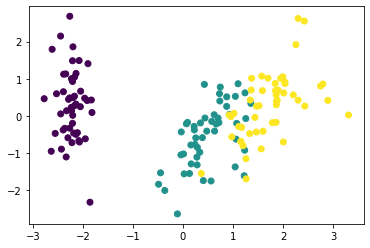

In [15]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)

# Algoritmi klasterovanja zasnovani na centroidima

## KMeans

In [16]:
from IPython.core.display import HTML
HTML("""
<video width="640" height="480" controls>
  <source src="assets/kmeans.mov" type="video/mp4">
</video>
""")

In [17]:
km = KMeans(n_clusters=3,n_init=100, max_iter=500, init='random')

In [18]:
km.fit(X)

KMeans(init='random', max_iter=500, n_clusters=3, n_init=100)

In [19]:
km.cluster_centers_

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

In [20]:
centroids = pca.transform(km.cluster_centers_)
centroids

array([[ 1.72103664,  0.60288719],
       [-2.22475316,  0.28892745],
       [ 0.57262144, -0.80720888]])

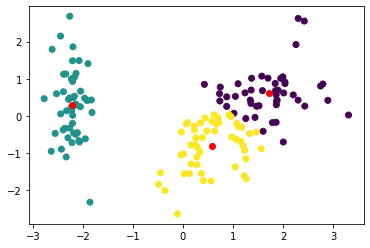

In [21]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=km.labels_)
plt.scatter(centroids[:,0],centroids[:,1],c='red')

#### Silueta skor
Za svaku instancu X:
- A = izračunava se kao prosečna udaljenost od svih instanci iz klastera u kojem se nalazi instanca X.
- B = izačunava se kao prosečna udaljenost od svih instanci iz najbližeg klastera klasteru u kojem se nalazi instanca X.
- Silueta instance X se izačunava kao : $\frac{(B-A)}{max(B,A)}$

Ukupna silueta klasterovanja izračunava se kao prosečna vrednost silueti svih instanci.

Ukoliko je za sve instance, vrednost B mnogo veća nego vrednost A, to bi značilo da je:
- prosečna udaljenost velika između klastera u kojem se instanca nalazi i najbližeg njenog klastera
- prosešna udaljenost između instanci iz istog klastera mala

Iz čega se zaključuje da je ukupna silueta bliska 1, što znači da su podaci u istim klasterima mnogo sličniji nego onim u ostalim klasterima.

Problem: kvadratna složenost izračunavanja u odnosu na broj instanci

#### Odredivanje optimalnog broja klastera

In [22]:
silhouettes = []
for n in range(2,10):
    km = KMeans(n_clusters=n,n_init=100, max_iter=500, init='random')
    km.fit(X)
    s = metrics.silhouette_score(X, km.labels_, metric='euclidean')
    silhouettes.append(s)

In [23]:
silhouettes

[0.5817500491982808,
 0.45994823920518635,
 0.383850922475103,
 0.34194697093163473,
 0.32674451109112396,
 0.32413601115437884,
 0.32921482231732657,
 0.35203836068774336]

<StemContainer object of 3 artists>

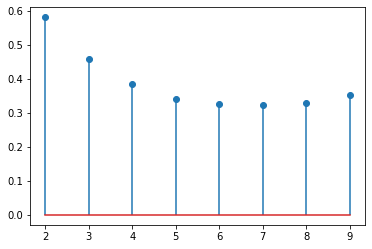

In [24]:
plt.stem(range(2,10),silhouettes)

Optimalan broj klastera bi bio 2, ali znamo da se u nasim podacima nalaze 3 razlicite grupe podataka (posledica toga sto su Versicolor i Verginica jako slicne)

## KMeans++ vs KMeans

<img src="assets/kmeanspp.png" alt="kmeans ++" width="700" height="500"/>

In [25]:
#isprobati za male vrednosti n_init i max_iter 
km = KMeans(n_clusters=3,n_init=1, max_iter=10, init='random',random_state=2)
kmpp= KMeans(n_clusters=3,n_init=1,max_iter=10,init='k-means++') #podrazumevano je k-means++

In [26]:
km.fit(X)

KMeans(init='random', max_iter=10, n_clusters=3, n_init=1, random_state=2)

In [27]:
kmpp.fit(X)

KMeans(max_iter=10, n_clusters=3, n_init=1)

In [28]:
km_centroids = pca.transform(km.cluster_centers_)

In [29]:
kmpp_centroids=pca.transform(kmpp.cluster_centers_)

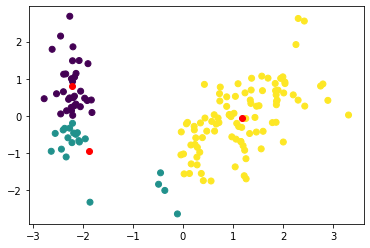

In [30]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=km.labels_)
plt.scatter(km_centroids[:,0],km_centroids[:,1],c='red')

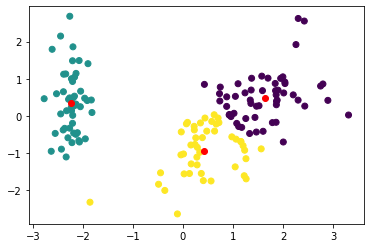

In [31]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=kmpp.labels_)
plt.scatter(kmpp_centroids[:,0],kmpp_centroids[:,1],c='red')

Nedostatak KMeans algoritma je manja otpornost na elemente van granica. Algoritam koji je robusniji na elemente van granica je KMedoids

In [32]:
#from sklearn_extra.cluster import KMedoids

#### Calinski-Harabasz indeks (Variance Ratio Criterion)
Izračunava se kao $\frac{A}{B}$, gde je:
- A = suma kvadriranih rastojanja izmedju svih centroida i centra celog dataseta
- B = suma kvadriranih rastojanja izmedju instanci i njihovog pridruženog centroida klastera

Vrednost A je mnogo veća od B:
- Udaljenost centroida od centra dataseta je velika
- Udaljenost između instanci i njihovih centroida je mala

Iz čega se zaključuje da je Calinski-Harabasz indeks visok, što znači da su klasteri dobro razdvojeni, dok niže vrednosti mogu sugerisati da su klasteri blizu jedni drugima, što može izazvati sumnju u kvalitet klasterovanja

Mnogo se brže izračunava nego Silueata, a ima istu intuiciju.

In [33]:
metrics.calinski_harabasz_score(X, km.labels_)

157.36015312192248

In [34]:
metrics.calinski_harabasz_score(X, kmpp.labels_)

239.48453205486402

# Algoritmi klasterovanja zasnovani na gustini

## DBSCAN

![DBSCAN](assets/smile_dbscan.gif)

In [35]:
# Testirati grid search za pronalaženje optimalnijih parametara
db = DBSCAN(eps=0.7, min_samples=3)
db.fit(X)

DBSCAN(eps=0.7, min_samples=3)

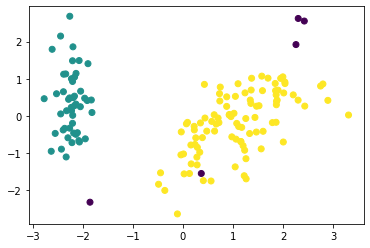

In [36]:
# Tamne tačke označavaju elemente van granica
_ = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db.labels_)

#### DBCV - Density-Based Clustering Validation
Problem Siluete i Calinski-Harabasz indeksa je ta što su uobičajeno visoki za konveksne i sferične klastere. Njihovo korišćenje nad klasterima proizvoljnog oblika, mogu dati pogrešne rezultate.


Izračunava se pomoću sledeće dve vrednosti:
- gustine unutar klastera
- gustine između klastera

Visoka gustina unutar klastera i niska gustina između klastera ukazuje na dobru razdvojenost klastera.

In [37]:
#!python -m pip install "git+https://github.com/FelSiq/DBCV"

In [38]:
#import dbcv

<img src="assets/silueta_mane.jpeg" alt="Silueta vs DBCV" width="700" height="500"/>

## DBSCAN++

## HDBSCAN

## OPTICS (Ordering Points To Identify Cluster Structure)

In [186]:
from sklearn.cluster import  OPTICS

In [187]:
op = OPTICS(min_samples=10, max_eps=float('inf'), xi=0.15)
_ = op.fit(X)

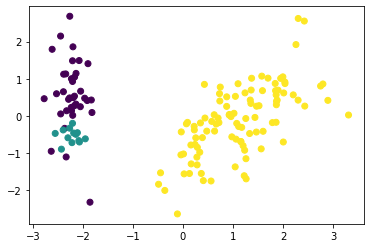

In [188]:
_ = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=op.labels_)

In [190]:
reachability = op.reachability_[op.ordering_]
order = op.ordering_

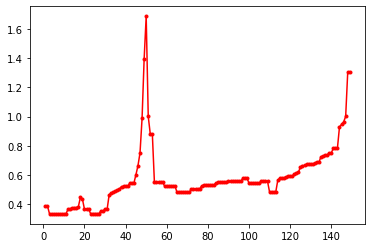

In [195]:
plt.plot(range(len(reachability)),reachability,color='r',marker='o',markersize=3)

Korisni linkovi:

https://www.dailydoseofds.com/dbscan-the-faster-and-scalable-alternative-to-dbscan-clustering/

https://www.dailydoseofds.com/hdbscan-the-supercharged-version-of-dbscan-an-algorithmic-deep-dive/

https://www.geeksforgeeks.org/ml-optics-clustering-explanation/
